# Problem 1

In [2]:
import numpy as np
from numpy.random import default_rng
import torch

## 1 Perceptron Algorithm

In [56]:
def get_dataset(n):
    rng = default_rng()
    x_1 = rng.random(n)
    x_2 = rng.random(n)
    y = (x_1 > x_2).astype(np.int32)
    X = np.stack([x_1, x_2], axis=1)
    return X, y

In [37]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [103]:
def perceptron_train(X, y, lr, epochs, bias=1.0, margin=0.0):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    # if a != 0:
    theta = np.zeros((n+1,1))
    # else:
        # theta = np.zeros((n,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, bias).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))

            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [104]:
def perceptron_test(X, y, theta, bias=1.0):
    # X --> Inputs.
    # y --> labels/target.
    # theta --> trained parameters.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    wrong_list = []

    for idx in range(len(X)):
        x_i = X[idx]
        x_i = np.insert(x_i, 0, bias).reshape(-1,1)
            
        # Calculating prediction/hypothesis.
        y_hat = step_func(np.dot(x_i.T, theta))
        if y_hat != y[idx]:
            wrong_list.append(idx)
    return 1 - len(wrong_list)/m

Train Accuracy, bias=0, 1.0
Test Accuracy, bias=0, 0.9936


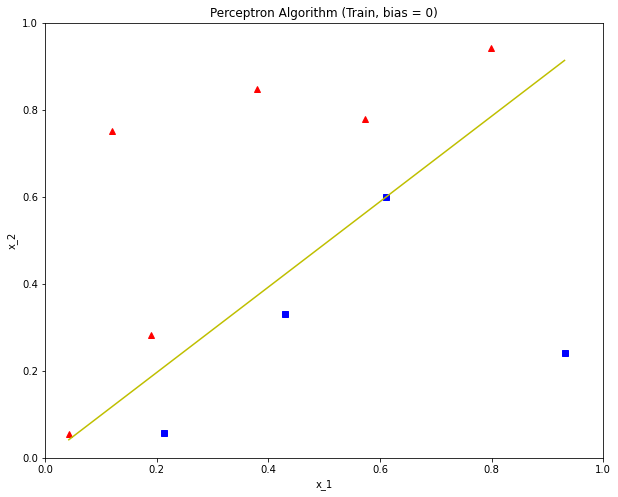

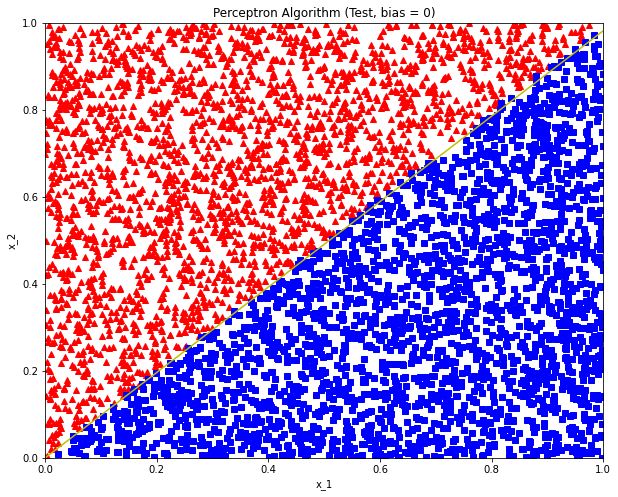

In [112]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, theta, title=""):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    # c = -theta[0]/theta[2]
    c = 0
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.title('Perceptron Algorithm' + title)
    plt.plot(x1, x2, 'y-')

train_X, train_y = get_dataset(10)
test_X, test_y = get_dataset(5000)

theta, _ = perceptron_train(train_X, train_y, 0.05, 100, bias=0, margin=0.0)
# print(theta)
plot_decision_boundary(train_X, train_y, theta, title=" (Train, bias = 0)")
plot_decision_boundary(test_X, test_y, theta, title=" (Test, bias = 0)")
print("Train Accuracy, bias=0,", perceptron_test(train_X, train_y, theta))
print("Test Accuracy, bias=0,", perceptron_test(test_X, test_y, theta))

# theta, _ = perceptron_train(train_X, train_y, 0.05, 100, a=1.0)
# plot_decision_boundary(train_X, train_y, theta, title=" (Train, a = 1)")
# plot_decision_boundary(test_X, test_y, theta, title=" (Test, a = 1)")
# print("Train Accuracy, a=1:", perceptron_test(train_X, train_y, theta))
# print("Test Accuracy, a=1:", perceptron_test(test_X, test_y, theta))

## 2 hinge-loss

In [113]:
def perceptron_train_hinge_loss(X, y, lr, epochs, bias=1.0, margin=0.0):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    # if a != 0:
    theta = np.zeros((n+1,1))
    # else:
        # theta = np.zeros((n,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, bias).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))

            # Updating if the example is misclassified.
            if (y_hat) * y[idx] < margin:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

Train Accuracy, bias=0, margin=1 1.0
Test Accuracy, bias=0, margin=1 0.9936


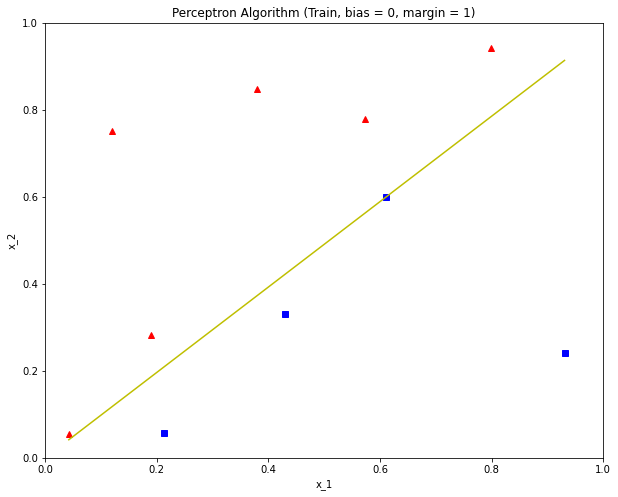

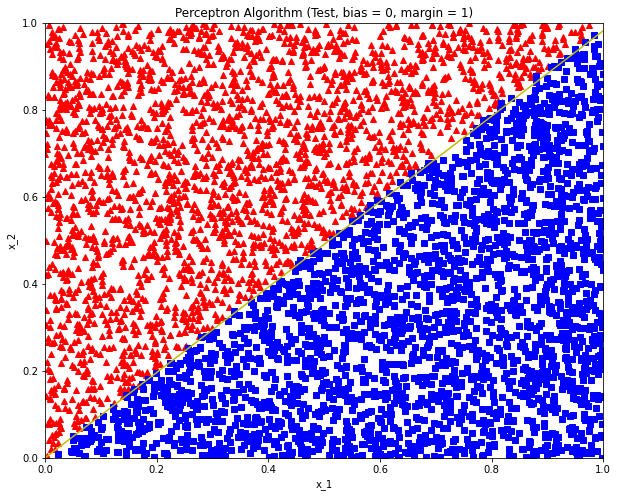

In [116]:
theta, _ = perceptron_train_hinge_loss(train_X, train_y, 0.05, 100, bias=0, margin=1.0)
# print(theta)
plot_decision_boundary(train_X, train_y, theta, title=" (Train, bias = 0, margin = 1)")
plot_decision_boundary(test_X, test_y, theta, title=" (Test, bias = 0, margin = 1)")
print("Train Accuracy, bias=0, margin=1", perceptron_test(train_X, train_y, theta))
print("Test Accuracy, bias=0, margin=1", perceptron_test(test_X, test_y, theta))

## 3
In which case do you obtain better test accuracy and why? (2)

If the y range is not in {-1,1}, then hinge-loss will achieve better accuracy.

## 4
In which case do you think that the classification of the same 5000 test instances will not change significantly by using a different set of 10 training points? (2)

If there are some instances of 10 training samples that are close to the decision boundary, then the classification of the same 5000 test instances will not change significantly.

# Problem 2 (Weight Initialization, Dead Neurons, Leaky ReLU)

## 1
Standard Normalization, Xavier Initialization, and He Initialization  
tanh, sigmoid, ReLU

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

2022-02-22 00:13:27.495645: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 00:13:27.517051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 00:13:27.517146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


1 Physical GPUs, 1 Logical GPUs


2022-02-22 00:13:27.518125: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-22 00:13:27.519188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 00:13:27.519359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 00:13:27.519450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [8]:
# import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault

from tensorflow import keras
from keras import optimizers
import numpy as np
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from matplotlib import pyplot as plt
import pandas as pd



def grid_axes_it(n_plots, n_cols=3, enumerate=False, fig=None):
    """
    Iterate through Axes objects on a grid with n_cols columns and as many
    rows as needed to accommodate n_plots many plots.
    Args:
        n_plots: Number of plots to plot onto figure.
        n_cols: Number of columns to divide the figure into.
        fig: Optional figure reference.
    Yields:
        n_plots many Axes objects on a grid.
    """
    n_rows = int(n_plots / n_cols + int(n_plots % n_cols > 0))

    if not fig:
        default_figsize = rcParamsDefault['figure.figsize']
        fig = plt.figure(figsize=(
            default_figsize[0] * n_cols,
            default_figsize[1] * n_rows
        ))

    for i in range(1, n_plots + 1):
        ax = plt.subplot(n_rows, n_cols, i)
        yield ax


def create_mlp_model(
    n_hidden_layers,
    dim_layer,
    input_shape,
    n_classes,
    kernel_initializer,
    bias_initializer,
    activation,
):
    """Create Multi-Layer Perceptron with given parameters."""
    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    return model


def create_cnn_model(input_shape, num_classes, kernel_initializer='glorot_uniform',
                     bias_initializer='zeros'):
    """Create CNN model similar to
       https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py."""
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape,
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer))
    model.add(Conv2D(64, (3, 3), activation='relu',
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu',
                    kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax',
                    kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    return model


def compile_model(model):
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])
    return model


def get_init_id(init):
    """
    Returns string ID summarizing initialization scheme and its parameters.
    Args:
        init: Instance of some initializer from keras.initializers.
    """
    try:
        init_name = str(init).split('.')[2].split(' ')[0]
    except:
        init_name = str(init).split(' ')[0].replace('.', '_')

    param_list = []
    config = init.get_config()
    for k, v in config.items():
        if k == 'seed':
            continue
        param_list.append('{k}-{v}'.format(k=k, v=v))
    init_params = '__'.join(param_list)

    return '|'.join([init_name, init_params])


def get_activations(model, x, mode=0.0):
    """Extract activations with given model and input vector x."""
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations(x)
    return output_elts


class LossHistory(keras.callbacks.Callback):
    """A custom keras callback for recording losses during network training."""

    def on_train_begin(self, logs={}):
        self.losses = []
        self.epoch_losses = []
        self.epoch_val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs={}):
        self.epoch_losses.append(logs.get('loss'))
        self.epoch_val_losses.append(logs.get('val_loss'))

### Define Dataset

In [14]:
seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

### Standard Normalization

#### Sigmoid 

In [33]:
# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
def std_norm_init_draw(activation='sigmoid'):
    rows = []
    sigmas = [0.10, 0.14, 0.28]
    for stddev in sigmas:
        init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
        activation = 'sigmoid'

        model = create_mlp_model(
            n_hidden_layers,
            dim_layer,
            (data_dim,),
            n_classes,
            init,
            'zeros',
            activation
        )
        compile_model(model)
        output_elts = get_activations(model, x_test)
        n_layers = len(model.layers)
        i_output_layer = n_layers - 1

        for i, out in enumerate(output_elts[:-1]):
            if i > 0 and i != i_output_layer:
                for out_i in out.ravel()[::20]:
                    rows.append([i, stddev, out_i])

    df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

    # Plot previously saved activations from the 5 hidden layers
    # using different initialization schemes.
    fig = plt.figure(figsize=(12, 6))
    axes = grid_axes_it(len(sigmas), 1, fig=fig)
    for sig in sigmas:
        ax = next(axes)
        ddf = df[df['Standard Deviation'] == sig]
        sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

        ax.set_xlabel('')
        ax.set_ylabel('')

        ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

        if sig == sigmas[1]:
            ax.set_ylabel(f"{activation} Neuron Outputs")
        if sig != sigmas[-1]:
            ax.set_xticklabels(())
        else:
            ax.set_xlabel("Hidden Layer")

    plt.tight_layout()
    plt.show()

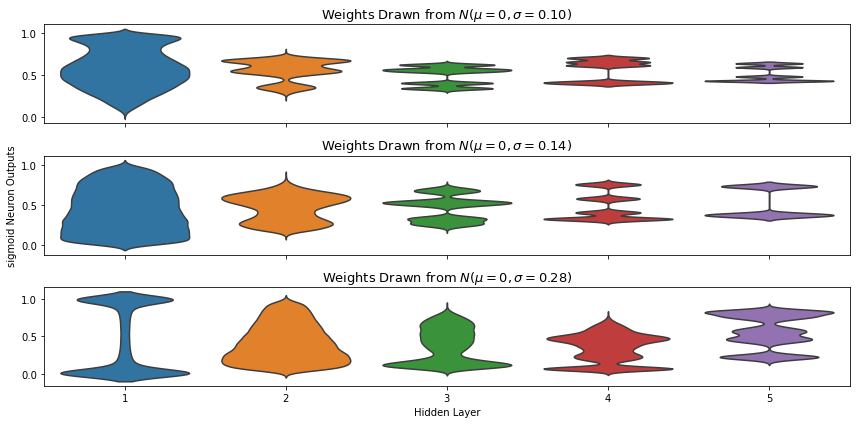

In [34]:
std_norm_init_draw(activation='sigmoid')

#### Tanh

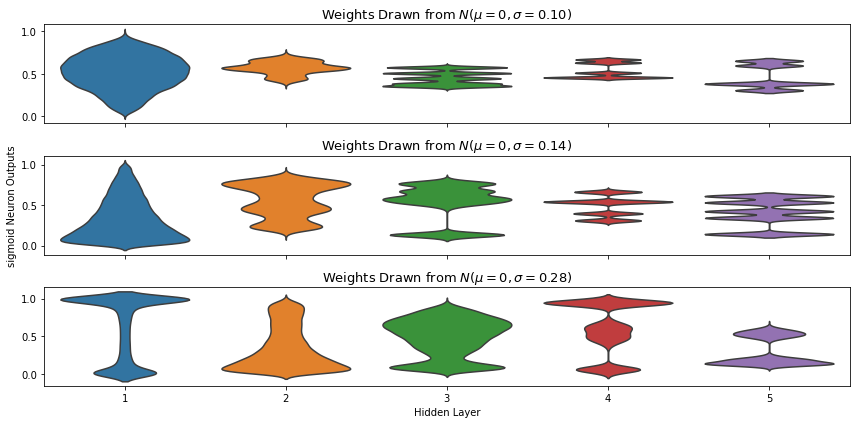

In [35]:
std_norm_init_draw(activation="tanh")

#### ReLU

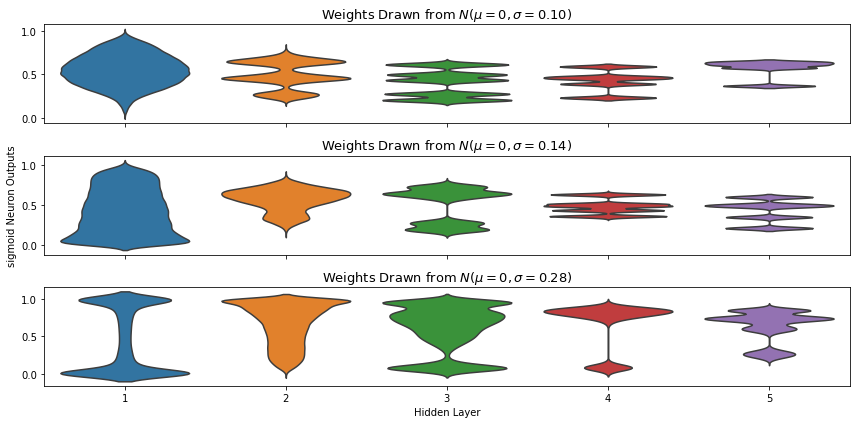

In [36]:
std_norm_init_draw(activation="relu")

### Xavier Initialization

In [54]:
# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
def xavier_init_draw(activation='sigmoid'):
    rows = []
    # sigmas = [0.10, 0.14, 0.28]
    # for stddev in sigmas:
        # init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    init = initializers.glorot_normalV2()
    # activation = 'sigmoid'

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model, x_test)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

    df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

    # Plot previously saved activations from the 5 hidden layers
    # using different initialization schemes.
    fig = plt.figure(figsize=(12, 6))
    axes = grid_axes_it(1, 1, fig=fig)
    # for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from Xavier (Glorot normal)', fontsize=13)

    ax.set_ylabel(f"{activation} Neuron Outputs")
    ax.set_xlabel("Hidden Layer")

    plt.tight_layout()
    plt.show()

#### Sigmoid

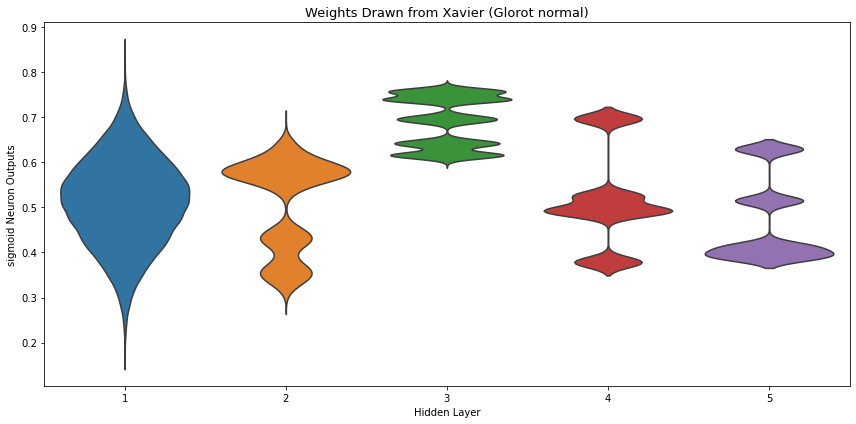

In [55]:
xavier_init_draw(activation="sigmoid")

#### Tanh

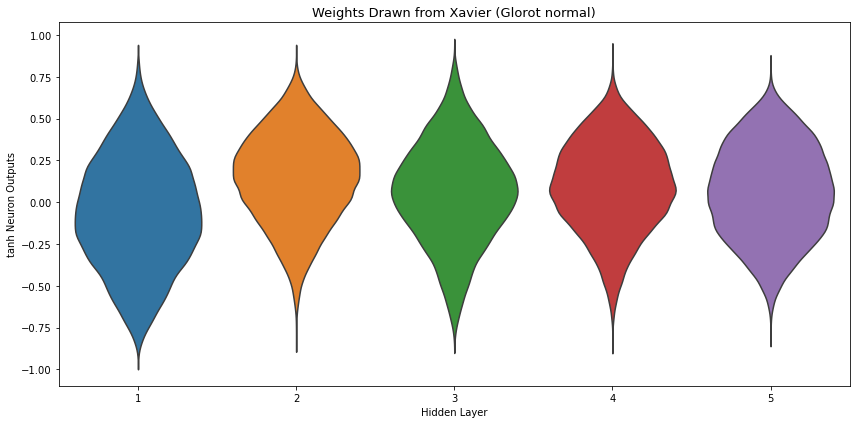

In [56]:
xavier_init_draw(activation="tanh")

#### ReLU

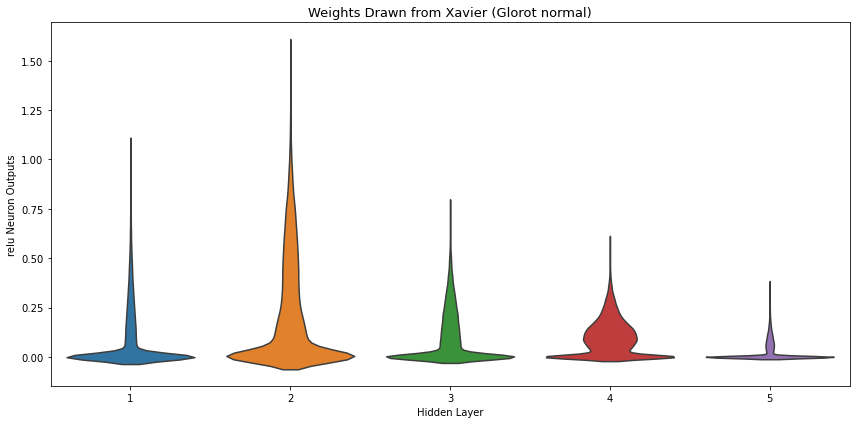

In [57]:
xavier_init_draw(activation="relu")

### He Initialization

In [58]:
# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
def he_init_draw(activation='sigmoid'):
    rows = []
    init = initializers.he_normalV2()

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model, x_test)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

    df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

    # Plot previously saved activations from the 5 hidden layers
    # using different initialization schemes.
    fig = plt.figure(figsize=(12, 6))
    axes = grid_axes_it(1, 1, fig=fig)
    # for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from Xavier (Glorot normal)', fontsize=13)

    ax.set_ylabel(f"{activation} Neuron Outputs")
    ax.set_xlabel("Hidden Layer")

    plt.tight_layout()
    plt.show()

#### Sigmoid

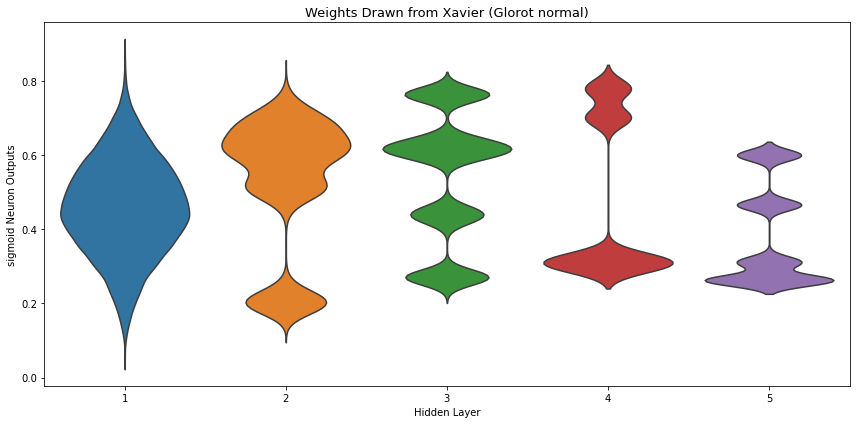

In [59]:
he_init_draw(activation="sigmoid")

#### Tanh

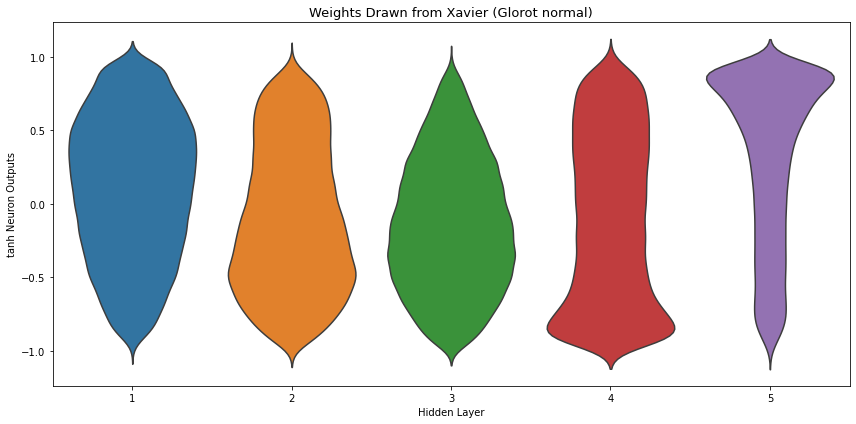

In [60]:
he_init_draw(activation="tanh")

#### ReLU

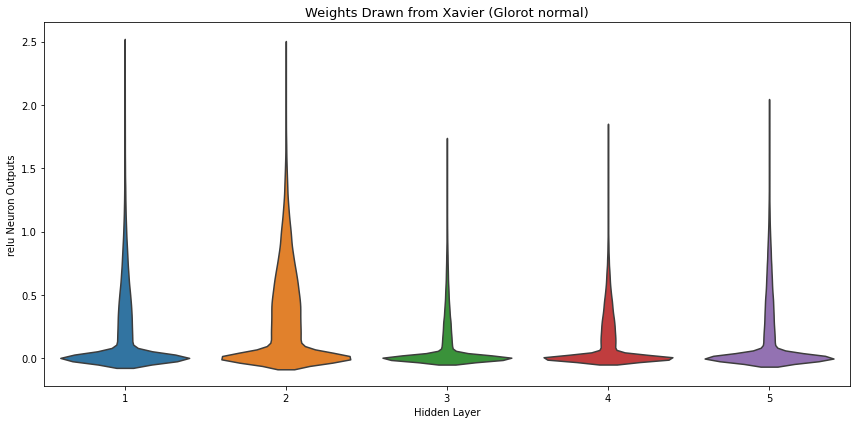

In [61]:
he_init_draw(activation="relu")

### Summary

Xavier initialization (also called Glorot initialization) was developed with aim to solve gradient vanishing problem, but for relu activation function, it is not necessary. Compaering the performance of Xavier initialization and He initialization for ReLU, He initialization is better, becuase the input and output is within the same range and scale.

## 2
The dying ReLU is a kind of vanishing gradient, which refers to a problem when ReLU neurons become inactive and only output 0 for any input. In the worst case of dying ReLU, ReLU neurons at a certain layer are all dead, i.e., the entire network dies and is referred as the dying ReLU neural networks in Lu et al (reference below). A dying ReLU neural network collapses to a constant function. Show this phenomenon using any one of the three 1-dimensional functions in page 13 of Lu et al. Use a 10-layer ReLU network with width 2 (hidden units per layer). Use minibatch of 64 and draw training data uniformly from [− √ 7, √ 7]. Perform 1000 independent training simulations each with 3,000 training points. Out of these 1000 simulations, what fraction resulted in neural network collapse. Is your answer close to over 90% as was reported in Lu et al. ? (10)

## 3
Run the 1000 training simulations in part 2 with Leaky ReLU activation and keeping everything else same. Again calculate the fraction of simulations that resulted in neural network collapse. Did Leaky ReLU help in preventing dying neurons ?

# Problem 3 (Batch Normalization, Dropout, MNIST)

## 1
Explain the terms co-adaptation and internal covariance-shift.

## 2
Train LeNet-5 with standard normalization of input and batch normalization for hidden layers.Train LeNet-5 with standard normalization of input and batch normalization for hidden layers.

### Model Definition

In [63]:
'''
Author: Xiang Pan
Date: 2022-02-21 23:54:59
LastEditTime: 2022-02-21 23:56:42
LastEditors: Xiang Pan
Description: 
FilePath: /NYU_DL_Sys/3_2.py
@email: xiangpan@nyu.edu
'''
from torch import nn


class LeNet5_BN(nn.Module):
    def __init__(self):
        super(LeNet5_BN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv1_bn = nn.BatchNorm2d(6)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv2_bn = nn.BatchNorm2d(16)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)

        self.fc1 = nn.Linear(256, 120)
        self.fc1_bn = nn.BatchNorm1d(120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.fc2_bn = nn.BatchNorm1d(84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)
        self.fc3_bn = nn.BatchNorm1d(10)
        self.relu5 = nn.ReLU()

    def forward(self, x):
        y = self.conv1(x)
        y = self.conv1_bn(y) # bn
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.conv2_bn(y) # bn
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.fc1_bn(y) # bn
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.fc2_bn(y) # bn
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.fc3_bn(y) # bn
        y = self.relu5(y)
        return y

### Model Training

In [74]:
# from model import Model
import numpy as np
import torch
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

def train():
    batch_size = 256
    train_dataset = mnist.MNIST(root='./cached_datasets/mnist/train', train=True, transform=ToTensor(), download=True)
    test_dataset = mnist.MNIST(root='./cached_datasets/mnist/test', train=False, transform=ToTensor(), download=True)
    train_loader = DataLoader(train_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    model = LeNet5_BN()
    sgd = SGD(model.parameters(), lr=1e-1)
    cost = CrossEntropyLoss()
    epoch = 10

    for _epoch in range(epoch):
        model.train()
        for idx, (train_x, train_label) in enumerate(train_loader):
            label_np = np.zeros((train_label.shape[0], 10))
            sgd.zero_grad()
            predict_y = model(train_x.float())
            loss = cost(predict_y, train_label.long())
            # if idx % 100 == 0:
                # print('idx: {}, loss: {}'.format(idx, loss.sum().item()))
            loss.backward()
            sgd.step()

        correct = 0
        _sum = 0
        model.eval()
        for idx, (test_x, test_label) in enumerate(test_loader):
            predict_y = model(test_x.float()).detach()
            predict_ys = np.argmax(predict_y, axis=-1)
            label_np = test_label.numpy()
            _ = predict_ys == test_label
            correct += np.sum(_.numpy(), axis=-1)
            _sum += _.shape[0]

        print(f'epoch:{_epoch}, accuracy: {correct / _sum}')
        torch.save(model, './cached_models/mnist_{:.2f}.pkl'.format(correct / _sum))

In [75]:
train()

epoch:0, accuracy: 0.9799
epoch:1, accuracy: 0.9846
epoch:2, accuracy: 0.9863
epoch:3, accuracy: 0.9876
epoch:4, accuracy: 0.9881
epoch:5, accuracy: 0.9889
epoch:6, accuracy: 0.9889
epoch:7, accuracy: 0.9891
epoch:8, accuracy: 0.9892
epoch:9, accuracy: 0.9901


### BN Parameters

In [78]:
for m in model.trainable_variables:
    print(m)

<tf.Variable 'dense_161/kernel:0' shape=(784, 100) dtype=float32, numpy=
array([[ 0.10026372, -0.08517696, -0.16639756, ..., -0.30593956,
         0.06144992, -0.19741811],
       [ 0.09477995, -0.11504284, -0.09466718, ...,  0.23560579,
        -0.19055188,  0.26547396],
       [ 0.31832114,  0.2912257 , -0.19476426, ..., -0.44668362,
         0.03867716,  0.42589444],
       ...,
       [ 0.22863774,  0.30976754,  0.0110667 , ..., -0.03887011,
        -0.45486167,  0.14063853],
       [-0.17690071, -0.26312506,  0.14155073, ...,  0.30022323,
         0.10584947, -0.06876485],
       [ 0.10079076, -0.30205062,  0.00175489, ..., -0.32836464,
        -0.16587596,  0.7349849 ]], dtype=float32)>
<tf.Variable 'dense_161/bias:0' shape=(100,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
      

# Problem 4 (Universal Approximators: Depth Vs. Width)

# Problem 5 (Learning Rate, Batch Size, FashionMNIST)